In [1]:
#importing all the libraries
import numpy as np
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt

In [2]:
#setting the data dir
DataDir='archive (1)/'

In [3]:
#intializing the category of classifcation
CATEGORIES = ['AbdomenCT','BreastMRI','ChestCT','CXR','Hand','HeadCT']

In [4]:
#intializing the size of the image so that evry iamge should be in same dimension
img_size = 100

In [5]:
#taking training data
full_data = []

In [6]:
#define a fucntion taking training data with grayscale and resize
def create_full_data():
    for i in CATEGORIES:
        path = os.path.join(DataDir,i)
        #for labels
        class_num = CATEGORIES.index(i)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(img_size,img_size))
                full_data.append([new_array,class_num])
            except Exception as e:
                pass
        

In [7]:
create_full_data()

In [8]:
#shuffle traing data
import random
random.shuffle(full_data)
for sample in full_data[:10]:
    print(sample)

[array([[138, 108,  71, ..., 135, 143, 149],
       [ 78,  60,  38, ...,  74,  78,  80],
       [  8,   4,   0, ...,   3,   1,   1],
       ...,
       [  3,   3,   4, ...,   2,   3,   4],
       [  3,   3,   4, ...,   2,   3,   4],
       [  3,   3,   4, ...,   2,   3,   5]], dtype=uint8), 3]
[array([[101, 101, 101, ..., 101, 101, 101],
       [101, 101, 101, ..., 101, 101, 101],
       [101, 101, 101, ..., 101, 101, 101],
       ...,
       [100, 100, 100, ..., 101, 101, 100],
       [102, 102, 102, ..., 102, 100,  99],
       [104, 104, 104, ..., 103, 101,  99]], dtype=uint8), 0]
[array([[55, 54, 53, ..., 53, 53, 53],
       [54, 54, 53, ..., 52, 53, 53],
       [54, 53, 53, ..., 52, 52, 53],
       ...,
       [56, 55, 54, ..., 51, 52, 53],
       [56, 55, 54, ..., 51, 52, 53],
       [56, 55, 54, ..., 51, 52, 53]], dtype=uint8), 4]
[array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0,

In [9]:
#taking feature and label
x = []
y = []
#splitting the feature and label
for feature, label in full_data:
    x.append(feature)
    y.append(label)

In [10]:
#reshaping our feature and labels by taking into numpy array ,bcz our model need more than 1 dimesnion
y = np.array(y)
x = np.array(x).reshape(-1,img_size,img_size,1)

In [11]:
# intializing the neural network layer for training the model
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Activation,Conv2D,MaxPooling2D,Flatten,Dense,Dropout
import pickle

In [12]:
#scalling the feature (like feature scaling sklearn)
#pixels values range(from 0 to 1)
#in order to scale it down to scale 0 to 1 we are performing this step
x = x/255.0


In [13]:
x.shape

(58954, 100, 100, 1)

In [14]:
#intializing the neural network layer for training the model
model = Sequential()
#first convolution layer
model.add(Conv2D(64,(3,3),input_shape = x.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))
#2nd convolution layer
model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))
#3rd convloution layer
model.add(Conv2D(256,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))
#flatten 
model.add(Flatten())
#taking hidden layer
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(.2))
#taking output layer
model.add(Dense(1))
model.add(Activation('softmax'))
model.add(Dropout(.2))

          

C:\Users\ddeba\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 98, 98, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 98, 98, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 49, 49, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 49, 49, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 47, 47, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 47, 47, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 21, 21, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 21, 21, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 10, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 10, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       1,638,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,008,193 (7.66 MB)

 Trainable params: 2,008,193 (7.66 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [17]:
model.fit(x,y,batch_size=4,epochs = 1)

C:\Users\ddeba\anaconda3\Lib\site-packages\keras\src\ops\nn.py:946: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
C:\Users\ddeba\anaconda3\Lib\site-packages\keras\src\losses\losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


14739/14739 ━━━━━━━━━━━━━━━━━━━━ 663s 45ms/step - accuracy: 0.1548 - loss: nan    


In [18]:
model.save(r'model_body.h5')

In [1]:
input_image = 'archive (1)/'

In [2]:
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import load_model

In [3]:
#intializing the category of classifcation
CATEGORIES = ['AbdomenCT','BreastMRI','ChestCT','CXR','Hand','HeadCT']

In [5]:
def prepare(image):
    img_size = 100
    img = tf.keras.preprocessing.image.load_img(image,color_mode='grayscale',target_size=(img_size,img_size))
    new_array = tf.keras.preprocessing.image.img_to_array(img)
    return new_array.reshape(-1,img_size,img_size,1)

In [6]:
#load model 
model = tf.keras.models.load_model(r'model_body.h5')


In [19]:
#taking image 
image = 'archive (1)/AbdomenCT/000001.jpeg'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
[[1.]]
BreastMRI


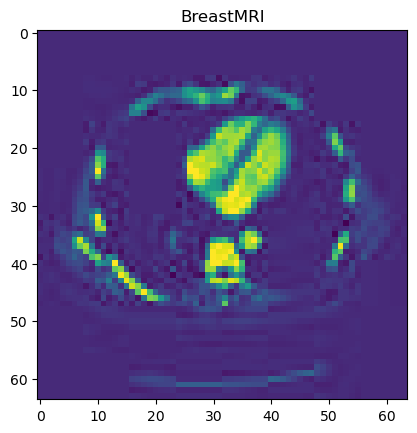

In [20]:
#prediction
predictions = model.predict([prepare(image)/255.])
print(predictions)
if predictions == 0:
    print('AbdomenCT')
elif predictions == 1:
    print('BreastMRI')
elif predictions == 2:
    print('ChestCT')
elif predictions == 3:
    print('CXR')
elif predictions == 4:
    print('Hand')
else:
    print('HeadCT')
#let s see the image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(image)
imgplot = plt.imshow(img)
plt.title(CATEGORIES[int(predictions[0][0])])
plt.show()
    

In [21]:
predictions


array([[1.]], dtype=float32)

C:\Users\ddeba\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 98, 98, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 98, 98, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 49, 49, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 49, 49, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 47, 47, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 47, 47, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 21, 21, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 21, 21, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 10, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 10, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,276,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             774 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 6)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,647,366 (13.91 MB)

 Trainable params: 3,647,366 (13.91 MB)

 Non-trainable params: 0 (0.00 B)

3317/3317 ━━━━━━━━━━━━━━━━━━━━ 363s 109ms/step - accuracy: 0.9835 - loss: 0.0550 - val_accuracy: 0.9969 - val_loss: 0.0119


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
Predicted Class: AbdomenCT


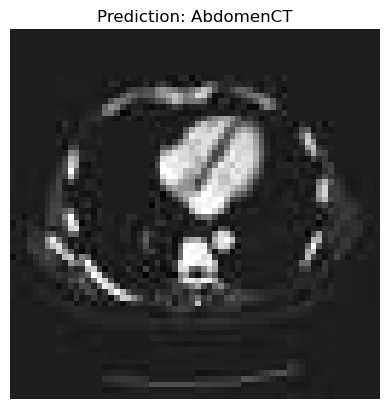

In [2]:
####main

# ===================== IMPORT LIBRARIES =====================
import os
import cv2
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation

# ===================== DATASET CONFIG =====================
DataDir = 'archive (1)/'
CATEGORIES = ['AbdomenCT','BreastMRI','ChestCT','CXR','Hand','HeadCT']
img_size = 100

# ===================== LOAD DATA =====================
full_data = []

def create_full_data():
    for category in CATEGORIES:
        path = os.path.join(DataDir, category)
        class_num = CATEGORIES.index(category)

        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_img = cv2.resize(img_array, (img_size, img_size))
                full_data.append([resized_img, class_num])
            except:
                pass

create_full_data()
random.shuffle(full_data)

# ===================== SPLIT FEATURES & LABELS =====================
x = []
y = []

for feature, label in full_data:
    x.append(feature)
    y.append(label)

x = np.array(x).reshape(-1, img_size, img_size, 1)
y = np.array(y)

# Normalize
x = x / 255.0

# ===================== BUILD CNN MODEL =====================
model = Sequential()

model.add(Conv2D(64, (3,3), input_shape=(100,100,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(256, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(len(CATEGORIES)))
model.add(Activation('softmax'))

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# ===================== TRAIN MODEL =====================
model.fit(x, y, batch_size=16, epochs=1, validation_split=0.1)
model.save('model_body.h5')

# ===================== PREDICTION =====================
def prepare(image_path):
    img = tf.keras.preprocessing.image.load_img(
        image_path,
        color_mode='grayscale',
        target_size=(img_size, img_size)
    )
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = img_array.reshape(-1, img_size, img_size, 1)
    return img_array / 255.0

model = load_model('model_body.h5')

image_path = 'archive (1)/AbdomenCT/000001.jpeg'
prediction = model.predict(prepare(image_path))
predicted_class = np.argmax(prediction)

print("Predicted Class:", CATEGORIES[predicted_class])

# ===================== SHOW IMAGE =====================
img = plt.imread(image_path)
plt.imshow(img, cmap='gray')
plt.title(f"Prediction: {CATEGORIES[predicted_class]}")
plt.axis('off')
plt.show()


In [5]:
CATEGORIES[np.argmax(prediction)]

'AbdomenCT'